In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
print(check_output(['ls', '../input']).decode('utf8'))

gender_submission.csv
test.csv
train.csv



In [4]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
final_res_data = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# This is done after some cells after reliasing the pclass and fare relationships
test_df.loc[test_df['Fare'].isnull(), 'Fare'] = 5

In [14]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

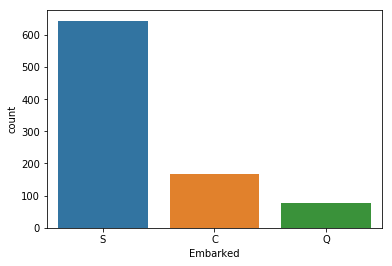

In [15]:
sns.countplot(data = train_df, x = 'Embarked')

In [16]:
pd.crosstab(train_df['Embarked'], train_df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [17]:
pd.crosstab(train_df['Embarked'], train_df['Survived'], margins = True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [18]:
train_df['Embarked'].fillna('S', inplace=True)

In [19]:
train_df['Embarked'].isnull().any()

False

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
for dataset in combine:
    dataset['isAlone'] = 0
    dataset['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [24]:
all_data = pd.concat([train_df, test_df], sort = False, ignore_index = True)
all_data.tail()
all_data['LastName'] = all_data['Name'].apply(lambda x: str.split(x, ',')[0])
all_data['FamilySurvival'] = 0.5
all_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone,FamilySize,LastName,FamilySurvival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,Cumings,0.5


In [25]:
for grp, grp_df in all_data.groupby(['LastName', 'Fare']):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()

            pass_id = row['PassengerId']
            if (smax == 1):
                all_data.loc[all_data['PassengerId'] == pass_id, 'FamilySurvival'] = 1
            elif (smin == 0):
                all_data.loc[all_data['PassengerId'] == pass_id, 'FamilySurvival'] = 0

In [26]:
for grp, grp_df in all_data.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['FamilySurvival'] == 0) | (row['FamilySurvival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()

                pass_id = row['PassengerId']
                if (smax == 1):
                    all_data.loc[all_data['PassengerId'] == pass_id, 'FamilySurvival'] = 1
                elif (smin == 0):
                    all_data.loc[all_data['PassengerId'] == pass_id, 'FamilySurvival'] = 0

train_df['FamilySurvival'] = all_data['FamilySurvival'][:891]
test_df['FamilySurvival'] = np.array(all_data['FamilySurvival'][891:])

In [27]:
test_df['FamilySurvival'].unique()

array([0.5, 1. , 0. ])

In [28]:
train_df[['isAlone', 'Survived']].groupby('isAlone').mean()

,Survived
isAlone,
0,0.505650
1,0.303538


In [29]:
for dataset in combine:
    dataset.drop(['SibSp', 'Parch', 'FamilySize', 'PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [30]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,isAlone,FamilySurvival
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,0,0.5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,0,0.5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,0.5
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,0,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,0.5


In [31]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,isAlone,FamilySurvival
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.00,S,1,0.5
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.00,S,1,0.5
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.45,S,0,0.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.00,C,1,0.5
890,0,3,"Dooley, Mr. Patrick",male,32.0,7.75,Q,1,0.5


In [32]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

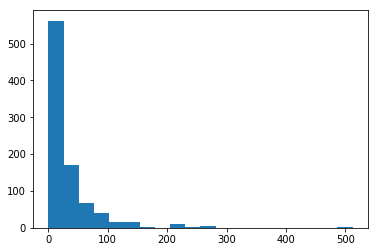

In [33]:
plt.hist(train_df['Fare'], bins = 20)

In [34]:
train_df['FareGroup'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareGroup', 'Survived']].groupby('FareGroup')['Survived'].mean()

FareGroup
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [35]:
for dataset in combine:
    dataset['FareGroup'] = pd.qcut(dataset['Fare'], 4)
    dataset.drop('Fare', axis = 1, inplace = True)

In [36]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Embarked,isAlone,FamilySurvival,FareGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S,0,0.5,"(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,0,0.5,"(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S,1,0.5,"(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,0,0.0,"(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,S,1,0.5,"(7.91, 14.454]"


In [37]:
pd.crosstab([train_df['Pclass'], train_df['Sex']], train_df['Survived'], margins = True)

Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

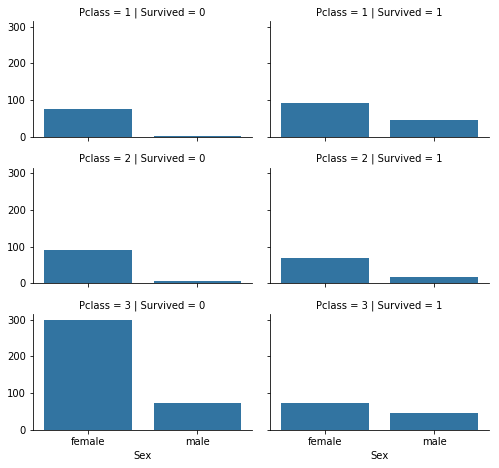

In [38]:
graph = sns.FacetGrid(train_df, row = 'Pclass', col = 'Survived', size = 2.2, aspect=1.6)
graph.map(sns.countplot, 'Sex')

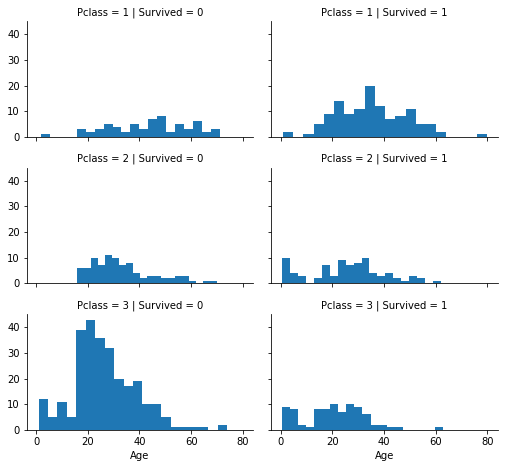

In [39]:
g = sns.FacetGrid(train_df, row = 'Pclass', col = 'Survived', size = 2.2, aspect = 1.6)
g.map(plt.hist, 'Age', bins = 20)
g.add_legend()

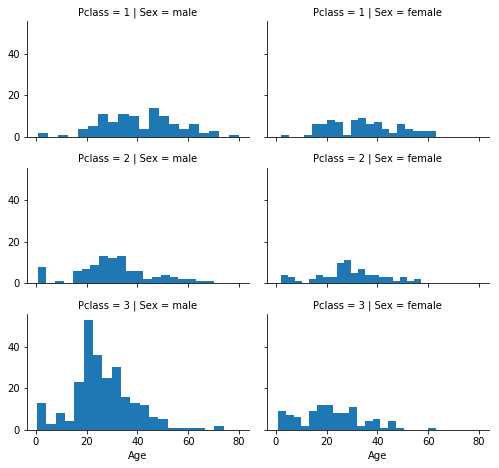

In [40]:
g = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex', size = 2.2, aspect = 1.6)
g.map(plt.hist, 'Age', bins = 20)

In [41]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Embarked,isAlone,FamilySurvival,FareGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S,0,0.5,"(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,0,0.5,"(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S,1,0.5,"(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,0,0.0,"(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,S,1,0.5,"(7.91, 14.454]"


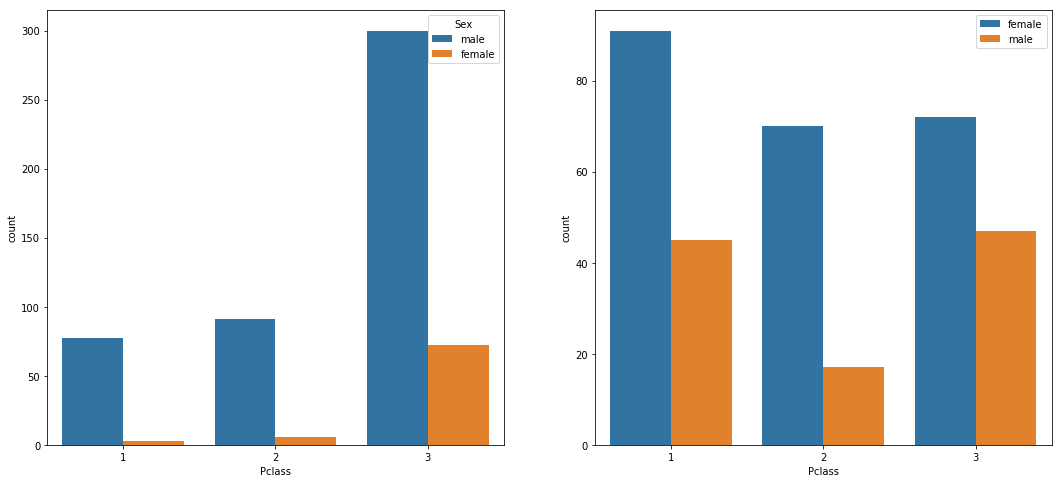

In [42]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot(data = train_df[train_df['Survived'] == 0], x = 'Pclass', hue = 'Sex', ax = ax[0])
sns.countplot(data = train_df[train_df['Survived'] == 1], x = 'Pclass', hue = 'Sex', ax = ax[1])
plt.legend()

In [43]:
for dataset in combine:
    dataset['Initial'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

In [44]:
pd.crosstab(train_df['Sex'], train_df['Initial'])

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [45]:
for dataset in combine:
    dataset['Initial'] = dataset['Initial'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Countess', 'Dona'], 'Others')
    dataset['Initial'] = dataset['Initial'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Initial'] = dataset['Initial'].replace(['Lady', 'Mme'], 'Mrs')

In [46]:
train_df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [47]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Embarked,isAlone,FamilySurvival,FareGroup,Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S,0,0.5,"(-0.001, 7.91]",Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,0,0.5,"(31.0, 512.329]",Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S,1,0.5,"(7.91, 14.454]",Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,0,0.0,"(31.0, 512.329]",Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,S,1,0.5,"(7.91, 14.454]",Mr


In [48]:
train_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Others    45.545455
Name: Age, dtype: float64

In [49]:
for dataset in combine:
    dataset.loc[dataset['Age'].isnull() & (dataset['Initial'] == 'Master'), 'Age'] = 5
    dataset.loc[dataset['Age'].isnull() & (dataset['Initial'] == 'Miss'), 'Age'] = 21
    dataset.loc[dataset['Age'].isnull() & (dataset['Initial'] == 'Mr'), 'Age'] = 32
    dataset.loc[dataset['Age'].isnull() & (dataset['Initial'] == 'Mrs'), 'Age'] = 36
    dataset.loc[dataset['Age'].isnull() & (dataset['Initial'] == 'Others'), 'Age'] = 45

In [50]:
for dataset in combine:
    print(dataset.isnull().any())

Survived          False
Pclass            False
Name              False
Sex               False
Age               False
Embarked          False
isAlone           False
FamilySurvival    False
FareGroup         False
Initial           False
dtype: bool
Pclass            False
Name              False
Sex               False
Age               False
Embarked          False
isAlone           False
FamilySurvival    False
FareGroup         False
Initial           False
dtype: bool


In [51]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Embarked,isAlone,FamilySurvival,FareGroup,Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S,0,0.5,"(-0.001, 7.91]",Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,0,0.5,"(31.0, 512.329]",Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S,1,0.5,"(7.91, 14.454]",Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,0,0.0,"(31.0, 512.329]",Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,S,1,0.5,"(7.91, 14.454]",Mr


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c2f90f4e0>]],
      dtype=object)

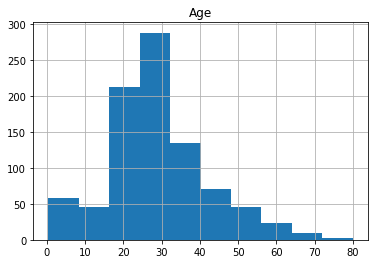

In [52]:
train_df.hist('Age')

In [53]:
train_df['AgeGroup'] = pd.qcut(train_df['Age'], 4)
train_df[['AgeGroup', 'Survived']].groupby('AgeGroup')['Survived'].mean()

AgeGroup
(0.419, 21.0]    0.454918
(21.0, 30.0]     0.385366
(30.0, 36.0]     0.325203
(36.0, 80.0]     0.367347
Name: Survived, dtype: float64

In [54]:
for dataset in combine:
    dataset['Person'] = dataset['Sex']
#     dataset.loc[dataset['Initial'] == 'Master', 'Person'] = 'Child'

In [55]:
for dataset in combine:
    dataset['AgeGroup'] = pd.qcut(dataset['Age'], 4)
    dataset.drop(['Age', 'Name', 'Sex'], axis = 1, inplace = True)

In [56]:
train_df.head()

,Survived,Pclass,Embarked,isAlone,FamilySurvival,FareGroup,Initial,AgeGroup,Person
0,0,3,S,0,0.5,"(-0.001, 7.91]",Mr,"(21.0, 30.0]",male
1,1,1,C,0,0.5,"(31.0, 512.329]",Mrs,"(36.0, 80.0]",female
2,1,3,S,1,0.5,"(7.91, 14.454]",Miss,"(21.0, 30.0]",female
3,1,1,S,0,0.0,"(31.0, 512.329]",Mrs,"(30.0, 36.0]",female
4,0,3,S,1,0.5,"(7.91, 14.454]",Mr,"(30.0, 36.0]",male


In [57]:
# Label Encoder
for dataset in combine:
    encoder = LabelEncoder()
    dataset['Embarked'] = encoder.fit_transform(dataset['Embarked'])
    dataset['FareGroup'] = encoder.fit_transform(dataset['FareGroup'])
    dataset['Initial'] = encoder.fit_transform(dataset['Initial'])
    dataset['AgeGroup'] = encoder.fit_transform(dataset['AgeGroup'])
    dataset['Person'] = encoder.fit_transform(dataset['Person'])

In [58]:
train_df.head()

,Survived,Pclass,Embarked,isAlone,FamilySurvival,FareGroup,Initial,AgeGroup,Person
0,0,3,2,0,0.5,0,2,1,1
1,1,1,0,0,0.5,3,3,3,0
2,1,3,2,1,0.5,1,1,1,0
3,1,1,2,0,0.0,3,3,2,0
4,0,3,2,1,0.5,1,2,2,1


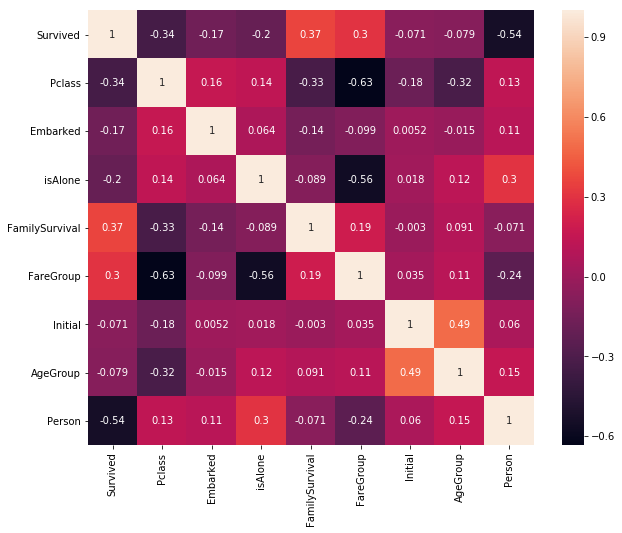

In [59]:
sns.heatmap(train_df.corr(), annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)

In [60]:
test_df.head()

,Pclass,Embarked,isAlone,FamilySurvival,FareGroup,Initial,Person,AgeGroup
0,3,1,0,0.5,0,2,1,2
1,3,2,0,0.5,0,3,0,3
2,2,1,1,0.5,1,2,1,3
3,3,2,0,0.5,1,2,1,1
4,3,2,1,1.0,1,3,0,1


# Training

In [61]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']
X_res = test_df
X_res.head()

,Pclass,Embarked,isAlone,FamilySurvival,FareGroup,Initial,Person,AgeGroup
0,3,1,0,0.5,0,2,1,2
1,3,2,0,0.5,0,3,0,3
2,2,1,1,0.5,1,2,1,3
3,3,2,0,0.5,1,2,1,1
4,3,2,1,1.0,1,3,0,1


In [62]:
X.head()

,Pclass,Embarked,isAlone,FamilySurvival,FareGroup,Initial,AgeGroup,Person
0,3,2,0,0.5,0,2,1,1
1,1,0,0,0.5,3,3,3,0
2,3,2,1,0.5,1,1,1,0
3,1,2,0,0.0,3,3,2,0
4,3,2,1,0.5,1,2,2,1


In [63]:
X_Pclass = pd.get_dummies(X['Pclass'], drop_first = True, prefix='Pclass')
X_Embarked = pd.get_dummies(X['Embarked'], drop_first = True, prefix = 'Embarked')
X_FareGroup = pd.get_dummies(X['FareGroup'], drop_first = True, prefix='FareGroup')
X_Initial = pd.get_dummies(X['Initial'], drop_first = True, prefix='Initial')
X_AgeGroup = pd.get_dummies(X['AgeGroup'], drop_first = True, prefix='AgeGroup')
X_Person = pd.get_dummies(X['Person'], drop_first = True, prefix='Person')
X.drop(['Pclass', 'Embarked', 'FareGroup', 'Initial', 'AgeGroup', 'Person'], axis = 1, inplace = True)
X = X.join([X_Pclass, X_Embarked, X_FareGroup, X_Initial, X_AgeGroup, X_Person])
X.head()

,isAlone,FamilySurvival,Pclass_2,Pclass_3,Embarked_1,Embarked_2,FareGroup_1,FareGroup_2,FareGroup_3,Initial_1,Initial_2,Initial_3,Initial_4,AgeGroup_1,AgeGroup_2,AgeGroup_3,Person_1
0,0,0.5,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
1,0,0.5,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,1,0.5,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0
3,0,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,1,0.5,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1


In [64]:
X_res_Pclass = pd.get_dummies(X_res['Pclass'], drop_first = True, prefix='Pclass')
X_res_Embarked = pd.get_dummies(X_res['Embarked'], drop_first = True, prefix = 'Embarked')
X_res_FareGroup = pd.get_dummies(X_res['FareGroup'], drop_first = True, prefix='FareGroup')
X_res_Initial = pd.get_dummies(X_res['Initial'], drop_first = True, prefix='Initial')
X_res_AgeGroup = pd.get_dummies(X_res['AgeGroup'], drop_first = True, prefix='AgeGroup')
X_res_Person = pd.get_dummies(X_res['Person'], drop_first = True, prefix='Person')
X_res.drop(['Pclass', 'Embarked', 'FareGroup', 'Initial', 'AgeGroup', 'Person'], axis = 1, inplace = True)
X_res = X_res.join([X_res_Pclass, X_res_Embarked, X_res_FareGroup, X_res_Initial, X_res_AgeGroup, X_res_Person])
X_res.head()

,isAlone,FamilySurvival,Pclass_2,Pclass_3,Embarked_1,Embarked_2,FareGroup_1,FareGroup_2,FareGroup_3,Initial_1,Initial_2,Initial_3,Initial_4,AgeGroup_1,AgeGroup_2,AgeGroup_3,Person_1
0,0,0.5,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1
1,0,0.5,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1,0.5,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1
3,0,0.5,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
4,1,1.0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0


In [65]:
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, random_state = 101, test_size = 0.3)

In [66]:
print(X_res.shape)

(418, 17)


In [67]:
# MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [68]:
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.832089552238806


In [69]:
model = SVC()
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.832089552238806


In [70]:
model = LinearSVC()
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8283582089552238


In [71]:
model = DecisionTreeClassifier()
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8656716417910447


In [72]:
model = RandomForestClassifier()
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8805970149253731


In [73]:
model = GaussianNB()
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7723880597014925


In [74]:
model = xgb.XGBClassifier()
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.835820895522388


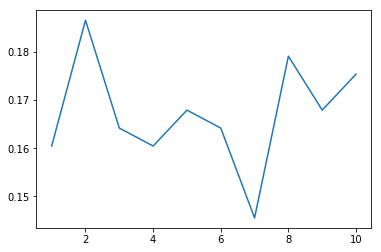

In [75]:
k_index = list(range(1, 11, 1))
k_error = []
for i in range(1, 11, 1):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X, y)
    predictions = model.predict(X_test)
    k_error.append(1 - accuracy_score(y_test, predictions))

plt.plot(k_index, k_error)

In [76]:
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X, y)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.835820895522388


In [77]:
# cross-valfrom sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

classifiers = ['Logistic Regression', 'SVC', 'LinearSVC', 'KNeighborsClassifier', 'DecisionTree', 'RandomForest', 'GaussianNB', 'XGBoost']
models = [LogisticRegression(), SVC(), LinearSVC(), KNeighborsClassifier(n_neighbors = 7), DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 100), GaussianNB(), xgb.XGBClassifier()]
mean_score = []

for i in range(len(classifiers)):
    model = models[i]
    cv_results = cross_val_score(model, X, y, cv = 10, scoring = 'accuracy')
    cv_results = cv_results.mean()
    mean_score.append(cv_results)

cv_df = pd.DataFrame({'Classifiers': classifiers, 'CV Score': mean_score})
cv_df

,Classifiers,CV Score
0,Logistic Regression,0.839547
1,SVC,0.846188
2,LinearSVC,0.837325
3,KNeighborsClassifier,0.827187
4,DecisionTree,0.839523
5,RandomForest,0.840646
6,GaussianNB,0.790069
7,XGBoost,0.836138


In [78]:
# Grid Search on Linear SVC
model = LinearSVC()
C = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid_parameters = {'C': C}
gm = GridSearchCV(model, grid_parameters)
gm.fit(X, y)
print(gm.best_score_)
print(gm.best_params_)

0.8417508417508418
{'C': 0.05}


In [79]:
# Grid Search on Kernel SVC
model = SVC()
C = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid_parameters = {'C': C, 'gamma': gamma}
gm = GridSearchCV(model, grid_parameters)
gm.fit(X, y)
print(gm.best_score_)
print(gm.best_params_)

0.8496071829405163
{'C': 0.9, 'gamma': 0.2}


In [80]:
# Grid Search on RandomForest
model = RandomForestClassifier()
n_estimators = list(range(100, 1000, 100))
grid_parameters = {'n_estimators': n_estimators}
gm = GridSearchCV(model, grid_parameters)
gm.fit(X, y)
print(gm.best_score_)
print(gm.best_params_)

0.8417508417508418
{'n_estimators': 200}


In [81]:
# Grid Search on XGBoost
model = xgb.XGBClassifier()
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
n_estimators = list(range(100, 1000, 100))
grid_parameters = {'learning_rate': learning_rate, 'n_estimators': n_estimators}
gm = GridSearchCV(model, grid_parameters)
gm.fit(X, y)
print(gm.best_score_)
print(gm.best_params_)

0.8484848484848485
{'learning_rate': 0.01, 'n_estimators': 200}


In [82]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X,y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8544776119402985
The cross validated score is 0.8405703098399728


In [83]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(X, y)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8507462686567164
The cross validated score for bagged KNN is: 0.8305203722619453


In [84]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X,y)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8619402985074627
The cross validated score for bagged Decision Tree is: 0.8473626716604243


In [85]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8439532970150948


In [86]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8451654182272159


In [88]:
final_model = RandomForestClassifier(n_estimators=100)
final_model.fit(X, y)
predictions = final_model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8619402985074627


In [89]:
y_pred = final_model.predict(X_res)

In [ ]:
# Submission
submission = {'PassengerId': final_res_data['PassengerId'], 'Survived': y_pred}
submission_df = pd.DataFrame(submission)
submission_df.head()
submission_df.to_csv('gender_submission_final_10.csv', index=False)